# Always Run this 2 lines of code first to download and unzip the dataset

In [ ]:
!gdown --id 1PfoB5-iabU26kbiwv1rxSkC5OnQhHRRU

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1PfoB5-iabU26kbiwv1rxSkC5OnQhHRRU
To: /content/Group_1.zip
100% 4.91M/4.91M [00:00<00:00, 82.4MB/s]


In [ ]:
!unzip /content/Group_1.zip

## There are Train and Test datset but no validation set is provided


## Import all the necessery Libraries

In [ ]:
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential,Model
from keras.layers import Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

In [ ]:
train_path = '/content/Group_1/train'
test_path = '/content/Group_1/test'

# get the list of directories in the path
train_directories = os.listdir(train_path)
test_directories = os.listdir(test_path)

# create a dictionary to store the count of instances in each class
train_class_counts = {}
test_class_counts = {}
total_train_instances = 0
total_test_instances=0

for directory in train_directories:
    # check if the item is a directory before listing its contents
    if os.path.isdir(os.path.join(train_path, directory)):
        files = os.listdir(os.path.join(train_path, directory))
        train_class_counts[directory] = len(files)
        total_train_instances+=len(files)

for directory in test_directories:
    # check if the item is a directory before listing its contents
    if os.path.isdir(os.path.join(test_path, directory)):
        files = os.listdir(os.path.join(test_path, directory))
        test_class_counts[directory] = len(files)
        total_test_instances+=len(files)


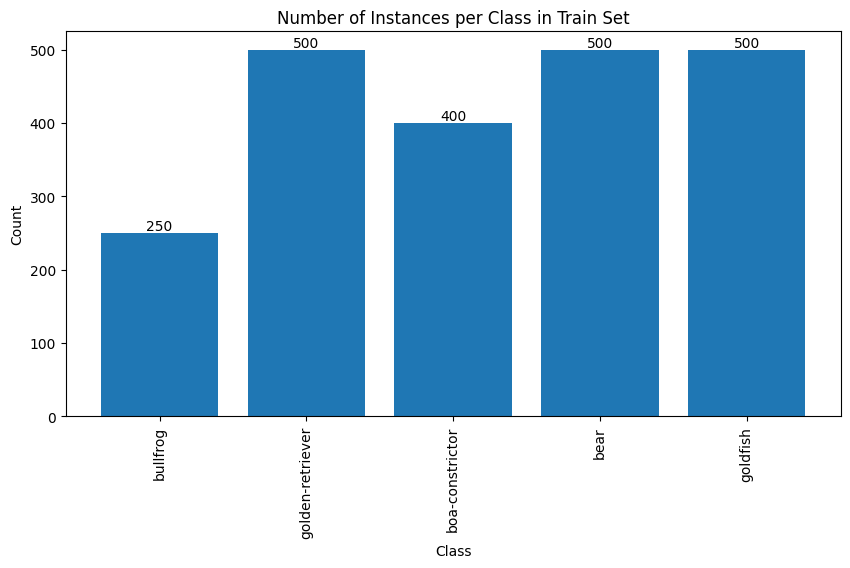

In [ ]:
plt.figure(figsize=(10, 5))
bars = plt.bar(train_class_counts.keys(), train_class_counts.values())
plt.title('Number of Instances per Class in Train Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Add the data value on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, yval, ha='center', va='bottom')

plt.show()


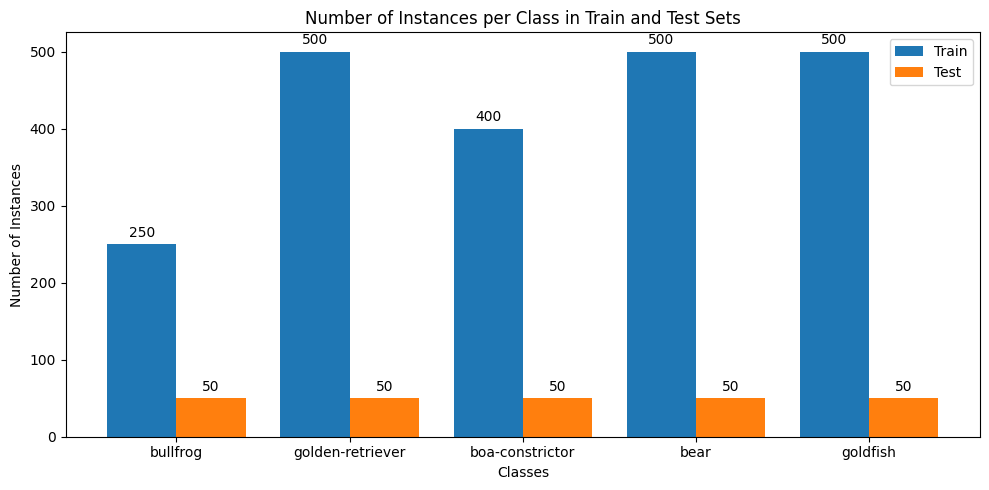

In [ ]:
classes = list(train_class_counts.keys())
train_values = list(train_class_counts.values())
test_values = list(test_class_counts.values())

x = np.arange(len(classes))  # the label locations

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(x - 0.2, train_values, 0.4, label='Train')
rects2 = ax.bar(x + 0.2, test_values, 0.4, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Classes')
ax.set_ylabel('Number of Instances')
ax.set_title('Number of Instances per Class in Train and Test Sets')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

# Function to attach a text label above each bar in *rects*, displaying its height
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

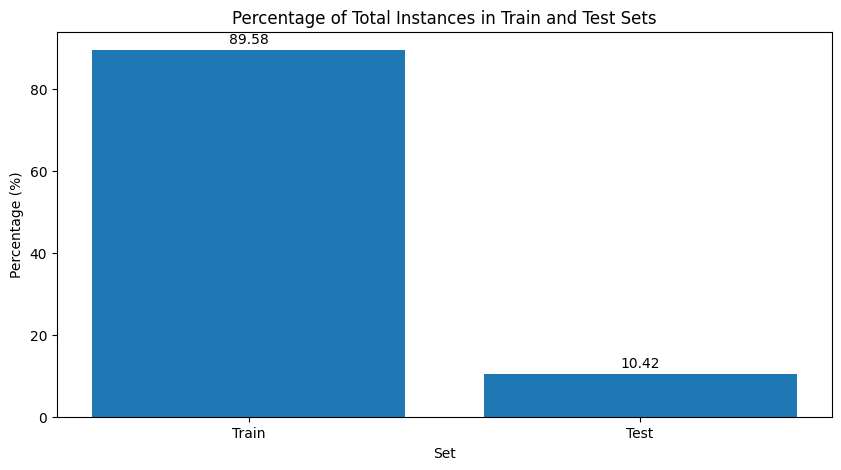

In [ ]:
# Create the bar chart
plt.figure(figsize=(10, 5))
total_instances = total_train_instances + total_test_instances

# Calculate the percentages
train_percentage = total_train_instances / total_instances * 100
test_percentage = total_test_instances / total_instances * 100
bars = plt.bar(['Train', 'Test'], [train_percentage, test_percentage])
plt.title('Percentage of Total Instances in Train and Test Sets')
plt.xlabel('Set')
plt.ylabel('Percentage (%)')

# Add the percentage on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.show()


## Skiping Handling Imbalanced Data


# Creating Train Test and Validation Data to pass on the model

In [ ]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)

train_path = '/content/Group_1/train'
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(64,64),
    batch_size=64,
    class_mode='categorical',
    subset='training')

validation_generator = datagen.flow_from_directory(
    train_path,
    target_size=(64,64),
    batch_size=64,
    class_mode='categorical',
    subset='validation')

datagen = ImageDataGenerator()

test_path = '/content/Group_1/test'
test_generator = datagen.flow_from_directory(
    test_path,
    target_size=(64,64),
    batch_size=64,
    class_mode='categorical')

Found 1828 images belonging to 5 classes.
Found 322 images belonging to 5 classes.
Found 250 images belonging to 5 classes.


In [ ]:
model = Sequential()

# add an input layer with shape (64, 64, 3)
model.add(Flatten(input_shape=(64, 64, 3)))

# add three hidden layers with some random number of neurons
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(256, activation='sigmoid'))

# add an output layer with 5 neurons (change this to match your output size)
model.add(Dense(5, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# specify the number of epochs
epochs = 25

# train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=epochs,
    shuffle=True)

Epoch 1/25
28/28 [==============================] - 3s 64ms/step - loss: 1.6410 - accuracy: 0.2120 - val_loss: 1.5790 - val_accuracy: 0.2344
Epoch 2/25
28/28 [==============================] - 2s 79ms/step - loss: 1.5936 - accuracy: 0.2262 - val_loss: 1.5836 - val_accuracy: 0.2344
Epoch 3/25
28/28 [==============================] - 2s 75ms/step - loss: 1.5930 - accuracy: 0.2364 - val_loss: 1.5776 - val_accuracy: 0.3313
Epoch 4/25
28/28 [==============================] - 1s 51ms/step - loss: 1.5806 - accuracy: 0.2551 - val_loss: 1.5628 - val_accuracy: 0.2344
Epoch 5/25
28/28 [==============================] - 1s 49ms/step - loss: 1.5543 - accuracy: 0.3209 - val_loss: 1.5585 - val_accuracy: 0.2344
Epoch 6/25
28/28 [==============================] - 1s 53ms/step - loss: 1.5347 - accuracy: 0.3322 - val_loss: 1.5470 - val_accuracy: 0.2656
Epoch 7/25
28/28 [==============================] - 1s 50ms/step - loss: 1.5063 - accuracy: 0.3832 - val_loss: 1.4769 - val_accuracy: 0.4094
Epoch 8/25
28

In [ ]:
test_steps = test_generator.samples // test_generator.batch_size + 1
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_steps)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

4/4 [==============================] - 0s 30ms/step - loss: 1.4447 - accuracy: 0.3600
Test Loss: 1.4447
Test Accuracy: 0.3600


In [ ]:
test_generator.reset()
predictions = model.predict(test_generator, steps=test_steps, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

4/4 [==============================] - 0s 28ms/step


In [ ]:
# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Generate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

                  precision    recall  f1-score   support

            bear       0.08      0.04      0.05        50
 boa-constrictor       0.00      0.00      0.00        50
        bullfrog       0.00      0.00      0.00        50
golden-retriever       0.19      0.72      0.30        50
        goldfish       0.21      0.14      0.17        50

        accuracy                           0.18       250
       macro avg       0.09      0.18      0.10       250
    weighted avg       0.09      0.18      0.10       250

Confusion Matrix:
[[ 2  0  0 44  4]
 [ 7  0  0 34  9]
 [ 3  0  0 42  5]
 [ 5  0  0 36  9]
 [ 8  0  0 35  7]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision, recall, F1-score, and support for each class
precision, recall, fscore, support = precision_recall_fscore_support(true_classes, predicted_classes, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {fscore:.4f}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate sensitivity, specificity, PPV, and NPV for each class
sensitivity = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
specificity = []
ppv = []
npv = []
for i in range(len(class_labels)):
    true_negatives = np.sum(np.delete(np.delete(conf_matrix, i, axis=0), i, axis=1))
    false_positives = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
    false_negatives = np.sum(conf_matrix[i, :]) - conf_matrix[i, i]

    specificity.append(true_negatives / (true_negatives + false_positives))
    ppv.append(conf_matrix[i, i] / (conf_matrix[i, i] + false_positives))
    npv.append(true_negatives / (true_negatives + false_negatives))

print(f"Sensitivity for each class: {sensitivity}")
print(f"Specificity for each class: {specificity}")
print(f"Positive Predictive Value (PPV) for each class: {ppv}")
print(f"Negative Predictive Value (NPV) for each class: {npv}")

Accuracy: 0.1800
Precision: 0.0949
Recall: 0.1800
F1-score: 0.1038
Confusion Matrix:
[[ 2  0  0 44  4]
 [ 7  0  0 34  9]
 [ 3  0  0 42  5]
 [ 5  0  0 36  9]
 [ 8  0  0 35  7]]
Sensitivity for each class: [0.04 0.   0.   0.72 0.14]
Specificity for each class: [0.885, 1.0, 1.0, 0.225, 0.865]
Positive Predictive Value (PPV) for each class: [0.08, nan, nan, 0.18848167539267016, 0.20588235294117646]
Negative Predictive Value (NPV) for each class: [0.7866666666666666, 0.8, 0.8, 0.7627118644067796, 0.8009259259259259]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-14-740057ee9006>:28: RuntimeWarning: invalid value encountered in long_scalars
  ppv.append(conf_matrix[i, i] / (conf_matrix[i, i] + false_positives))


# Milestone-2

In [ ]:
import os
import cv2
import numpy as np
import albumentations as A
import matplotlib.pyplot as plt
from albumentations.pytorch import ToTensorV2
from tqdm import tqdm
import torch

# Check if CUDA is available and set PyTorch to use GPU or CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the augmentation pipeline
transform = A.Compose([
    A.Lambda(image=lambda image, **kwargs: cv2.resize(image, (image.shape[1]*4, image.shape[0]*4))),  # Upscale image by a factor of 2
    A.HorizontalFlip(p=0.5),
    #A.VerticalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    # Add more transformations as you need
    ToTensorV2(),
])

def calculate_brightness(image):
    return np.mean(image)

# Directory where your data is stored
data_dir = '/content/Group_1/train'

# Loop over all classes
for class_dir in tqdm(os.listdir(data_dir), desc='Processing classes'):
    class_path = os.path.join(data_dir, class_dir)

    if not os.path.isdir(class_path):
        continue

    # Loop over all images in the class directory
    for img_name in tqdm(os.listdir(class_path), desc='Processing images'):
        img_path = os.path.join(class_path, img_name)

        # Read the image
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        brightness = calculate_brightness(img)
        if brightness < 100:  # Adjust the threshold as needed
            transform.transforms.insert(3, A.RandomBrightnessContrast(brightness_limit=0.2, p=1.0))

        # Apply the transformations
        augmented = transform(image=img)
        transformed_img = augmented['image'].to(device)  # Move the image data to GPU
        A.ToGray(p=1)

        # Save the transformed image (you might want to save it to a different directory)
        transformed_img_path = os.path.join(class_path, 'aug_' + img_name)
        cv2.imwrite(transformed_img_path, transformed_img.cpu().permute(1, 2, 0).numpy())  # Move the image data back to CPU for saving

        # Visualize the original and augmented image
        """fig, ax = plt.subplots(1, 2, figsize=(10, 5))
        ax[0].imshow(img)
        ax[0].set_title('Original Image')
        ax[1].imshow(transformed_img.cpu().permute(1, 2, 0))  # Move the image data back to CPU for displaying
        ax[1].set_title('Augmented Image')
        plt.show()"""


In [ ]:
from torch.utils.data import Dataset, random_split, DataLoader
from torchvision import transforms
from PIL import Image
import glob

class CustomDataset(Dataset):
    def __init__(self, root_dir, class_names=None, transform=None):
        self.root_dir = root_dir
        self.class_names = class_names
        self.transform = transform
        self.image_paths = glob.glob(root_dir + '/*/aug_*.JPEG')  # Only load augmented images

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path)
        label = img_path.split('/')[-2]  # Assuming the directory structure is: root_dir/class_name/image.jpg

        # Convert the label to a numerical value
        label = self.class_names.index(label)

        if self.transform:
            image = self.transform(image)

        return image, label



# Initialize the dataset
dataset = CustomDataset('/content/Group_1/train',['bear','boa-constrictor','bullfrog','golden-retriever','goldfish'], transform=transforms.ToTensor())

# Split the dataset into training and validation sets
train_size = int(0.8 * len(dataset))  # Use 80% of the dataset for training
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create DataLoaders for the training and validation sets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


# Alex net

In [ ]:
import torch
import torch.nn as nn

class AlexNet(nn.Module):
    def __init__(self, num_classes=5):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x


In [ ]:
from torchsummary import summary

# Create an instance of the AlexNet model
model = AlexNet(num_classes=5).to(device)

# Print the trainable parameters
print("Trainable parameters:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name)

# Print the summary of the model
print("\nModel Summary:")
summary(model, (3, 128, 128))


Trainable parameters:
features.0.weight
features.0.bias
features.3.weight
features.3.bias
features.6.weight
features.6.bias
features.8.weight
features.8.bias
features.10.weight
features.10.bias
classifier.1.weight
classifier.1.bias
classifier.4.weight
classifier.4.bias
classifier.6.weight
classifier.6.bias

Model Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 

# Custom

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class PartitionedModel(nn.Module):
    def __init__(self):
        super(PartitionedModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.upsample1 = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=False)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.upsample2 = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=False)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.downsample = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(128*4, 5)  # Assuming 5 classes

    def forward(self, x):
        # Split the image into four partitions
        x1 = x[:, :, :64, :64]
        x2 = x[:, :, :64, 64:]
        x3 = x[:, :, 64:, :64]
        x4 = x[:, :, 64:, 64:]

        # Apply the model to each partition
        x1 = self.apply_layers(x1)
        x2 = self.apply_layers(x2)
        x3 = self.apply_layers(x3)
        x4 = self.apply_layers(x4)

        # Concatenate the output of each partition
        x = torch.cat((x1, x2, x3, x4), dim=1)

        # Apply the fully connected layer
        x = self.fc(x)
        return x

    def apply_layers(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.upsample1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.upsample2(x)
        x = self.pool2(x)
        x = self.downsample(x)
        x = torch.flatten(x, 1)
        return x


In [ ]:
import torch
import torch.nn as nn
from torch.optim import Adam
from tqdm import tqdm

# Assuming the PartitionedModel class is defined as before
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create an instance of the model
model = PartitionedModel()
model = model.to(device)

# Define a loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001)

# Number of epochs
num_epochs = 10

# Lists for loss and accuracy storage
train_loss = []
val_loss = []
train_acc = []
val_acc = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in tqdm(train_loader, desc='Training'):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss.append(running_loss/len(train_loader))
    train_acc.append(100 * correct / total)

    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in tqdm(val_loader, desc='Validation'):
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss.append(running_loss/len(val_loader))
    val_acc.append(100 * correct / total)

    print(f"Epoch {epoch+1}, Training Loss: {train_loss[-1]}, Training Accuracy: {train_acc[-1]}, Validation Loss: {val_loss[-1]}, Validation Accuracy: {val_acc[-1]}")


In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from tqdm import tqdm

# Assuming the PartitionedModel class is defined as before
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create an instance of the model
model = PartitionedModel()
model = model.to(device)

# Define a loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001)

# Define the transformations for the datasets
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to fit the model input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize with ImageNet mean and std
])

# Load the training and test datasets
train_data = datasets.ImageFolder(root='/content/Group_1/train', transform=transform)
test_data = datasets.ImageFolder(root='/content/Group_1/test', transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Train the model
for epoch in range(10):  # Number of epochs
    model.train()
    running_loss = 0.0
    for inputs, labels in tqdm(train_loader, desc='Training'):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

# Test the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in tqdm(test_loader, desc='Testing'):
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on test data: {100 * correct / total}%")


Training: 100%|██████████| 68/68 [00:29<00:00,  2.32it/s]


Epoch 1, Loss: 1.5294483637108522


Training: 100%|██████████| 68/68 [00:28<00:00,  2.39it/s]


Epoch 2, Loss: 1.432145637624404


Training: 100%|██████████| 68/68 [00:28<00:00,  2.40it/s]


Epoch 3, Loss: 1.4003656751969282


Training: 100%|██████████| 68/68 [00:28<00:00,  2.40it/s]


Epoch 4, Loss: 1.3708885855534498


Training: 100%|██████████| 68/68 [00:29<00:00,  2.29it/s]


Epoch 5, Loss: 1.3475817380582584


Training: 100%|██████████| 68/68 [00:28<00:00,  2.39it/s]


Epoch 6, Loss: 1.3363577723503113


Training: 100%|██████████| 68/68 [00:28<00:00,  2.38it/s]


Epoch 7, Loss: 1.3175768203595106


Training: 100%|██████████| 68/68 [00:28<00:00,  2.39it/s]


Epoch 8, Loss: 1.3083247752750622


Training: 100%|██████████| 68/68 [00:28<00:00,  2.38it/s]


Epoch 9, Loss: 1.2994480711572312


Training: 100%|██████████| 68/68 [00:28<00:00,  2.37it/s]


Epoch 10, Loss: 1.3036445537034203


Testing: 100%|██████████| 4/4 [00:00<00:00,  5.85it/s]

Accuracy on test data: 58.8%


In [ ]:
import matplotlib.pyplot as plt

# Initialize your model
model = PartitionedModel().to(device)

# Define a loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Initialize lists to monitor test loss and accuracy
train_loss = []
val_loss = []

# Number of epochs to train the model
num_epochs = 10

for epoch in range(num_epochs):
    # monitor training loss
    train_losses = []
    val_losses = []

    ###################
    # train the model #
    ###################
    model.train() # prep model for training
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

    ######################
    # validate the model #
    ######################
    model.eval() # prep model for evaluation
    for i, (images, labels) in enumerate(val_loader):
        images = images.to(device)
        labels = labels.to(device)
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(images)
        # calculate the loss
        loss = criterion(output, labels)
        # update running validation loss
        val_losses.append(loss.item())

    # print training/validation statistics
    # calculate average loss over an epoch
    train_loss.append(np.average(train_losses))
    val_loss.append(np.average(val_losses))

    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch+1,
        train_loss[-1],
        val_loss[-1]
        ))

# plot the loss
plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss over the epochs")
plt.plot(val_loss, label="val")
plt.plot(train_loss, label="train")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()
